
# **4. Model Results in NetCDF format and OpeNDAP**
</div>

**NetCDF** ([Network Common Data Form](https://www.unidata.ucar.edu/software/netcdf/)) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a cmmunity standard for sharing scientific data.
Programming interfaces are avaialbe for C, C++, Fortran, Python, MATLAB, R etc.

**OpeNDAP** is a framework that simplifies all aspects of scientific data networking. It provides software which makes local data accessible to remote locations regardless of local storage format.

With OPeNDAP, you can access data using an OPeNDAP URL of any database server that supports OPeNDAP. You can do this via command-line, internet browser, or a custom UI. You can also use other NetCDF compliant tools, such as MATLAB, R, python ...

*   The Hybrid Coordinate Ocean Model ([**HYCOM**](https://www.hycom.org/)): a data-assimilative hybrid isopycnal-sigma-pressure (generalized) coordinate ocean model. The subset of HYCOM data hosted in EE contains the variables salinity, temperature, velocity, and elevation.
*   NCEP North American Regional Reanalysis ([**NARR**](https://psl.noaa.gov/data/gridded/data.narr.html)): NCEP's high resolution combined model and assimilated dataset. From 1979 to near present 8-times daily, daily and monthly data is output on a Northern Hemisphere Lambert Conformal Conic grid.
*    World Ocean Atlas Data

Limited by time, we will only go through the HYCOM dataset as an example.






##**3.1 Install pydap**

In [ ]:
# install pydap python library
#!pip install git+https://github.com/pydap/pydap.git@fc0dd0e6f180e455dbb68a06a85f84b1eca6754f
!pip install pydap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e18a7d5a135176f1441cc8679c8a2d081b91431121ac8627e3985c4465db0955
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


##**3.2 import open_url**
You may need to manually change the name of collections if errors occur
Change from "collections import Iterable" to "from collections.abc import Iterable"
Change from "collections import Mapping" to "from collections.abc import Iterable"

In [ ]:
from pydap.client import open_url

In [ ]:
url='http://tds.hycom.org/thredds/dodsC/GLBv0.08/expt_93.0/ts3z'
#url='https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2022/035_archv.2022_009_23_3z.nc?Date[0:1:0],Latitude[0:1:384],Longitude[0:1:524],water_temp[0:1:0][0:1:0][0:1:0][0:1:0]'
#url='https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2022/035_archv.2022_009_23_3z.nc'
dataset = open_url(url)
print(dataset)

<DatasetType with children 'depth', 'lat', 'lon', 'time', 'tau', 'water_temp', 'water_temp_bottom', 'salinity', 'salinity_bottom'>


In [ ]:
#print(dataset['Longitude'].shape)
#print(dataset['Latitude'].shape)
#print(dataset['water_temp'].shape)
#print(dataset['Depth'].shape)

In [ ]:
print(dataset['depth'].shape)
print(dataset['lon'].shape)
print(dataset['lat'].shape)
print(dataset['time'])


#t=dataset['time']
#print(t.attributes)

lon = dataset['lon'][:]
lat = dataset['lat'][:]
print('lon: '+str(min(lon))+' to '+str(max(lon)))
print('lat: '+str(min(lat))+' to '+str(max(lat)))
#plt.plot(np.array(lon))
#plt.plot(np.array(lat))

(40,)
(4500,)
(3251,)
<BaseType with data BaseProxy('http://tds.hycom.org/thredds/dodsC/GLBv0.08/expt_93.0/ts3z', 'time', dtype('>f8'), (6128,), (slice(None, None, None),))>
lon: 0.0 to 359.9200439453125
lat: -80.0 to 90.0


##**3.3 Download data from the server**
we can download data from the server. To download data we simply access it like we would access a Numpy array, and the data for the corresponding subset will be dowloaded on the fly from the server.

In [ ]:
#is_range = lon>79
from numpy import *
import numpy as np
indices_lon = np.argwhere(np.logical_and(lon>-80+360,lon<-60+360))
indices_lat = np.argwhere(np.logical_and(lat>25,lat<40))
# find indices for longitude and latitude.
print('indices_lon: '+str(min(indices_lon)[0])+' to '+str(max(indices_lon)[0]))
print('indices_lat: '+str(min(indices_lat)[0])+' to '+str(max(indices_lat)[0]))

indices_lon: 3501 to 3749
indices_lat: 1813 to 1999


In [ ]:
temp=dataset['water_temp']
# check attributes of temp
print(temp.dimensions)
print(temp.shape)
print(temp.attributes)

('time', 'depth', 'lat', 'lon')
(6128, 40, 3251, 4500)
{'long_name': 'Water Temperature', 'standard_name': 'sea_water_temperature', 'units': 'degC', '_FillValue': -30000, 'missing_value': -30000, 'scale_factor': 0.001, 'add_offset': 20.0, 'NAVO_code': 15, 'comment': 'in-situ temperature'}


In [ ]:
scale_factor, add_offset=temp.attributes['scale_factor'], temp.attributes['add_offset']
print("scale_factor" + str(scale_factor))
print("add_offset" + str(add_offset))

sst=temp.array[0,0,min(indices_lat)[0]:max(indices_lat)[0],min(indices_lon)[0]:max(indices_lon)[0]]
sst=np.squeeze(sst)


scale_factor0.001
add_offset20.0


In [ ]:
sst=np.squeeze(sst)*scale_factor+add_offset
sst[sst==-10] = np.nan
print(sst.shape)
#print(sst)

long, lati=lon[min(indices_lon)[0]:max(indices_lon)[0]], lat[min(indices_lat)[0]:max(indices_lat)[0]]
#print(long)
#print(lati)

xx,yy=np.meshgrid(long,lati)
print(xx.shape)

(186, 248)
(186, 248)


##**3.3 Make the contour plot**

In [ ]:
!pip install git+https://github.com/wzhengui/pylibs.git
from pylib import *

  Cloning https://github.com/wzhengui/pylibs.git to /tmp/pip-req-build-7815of9p
  Running command git clone --filter=blob:none --quiet https://github.com/wzhengui/pylibs.git /tmp/pip-req-build-7815of9p
  Resolved https://github.com/wzhengui/pylibs.git to commit b35b37a94f55568d93371a31f113e5f07fb63497
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.0 MB/s eta 0:00:00
  Created wheel for pylibs-ocean: filename=pylibs_ocean-1.0.1-py3-none-any.whl size=388600 sha256=1af604ed3724732c5c3dc65427c84734b9001017e0f750dbd377458094c0512f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ldxu51sa/wheels/20/52/e1/8379a0fe3ac5ef568126f951b46e7f2e16eeef51057a0429ef
Successfully built pylibs-ocean


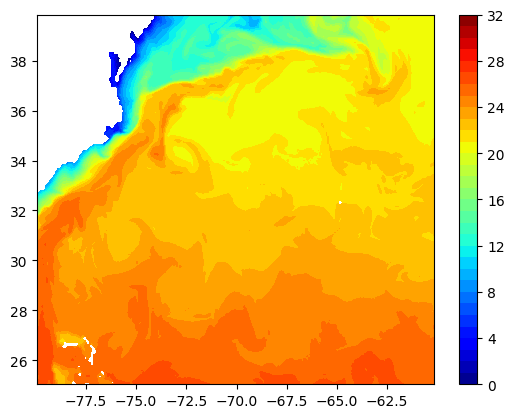

In [ ]:
levels=[*linspace(0,32,33)]
contourf(xx-360,yy,sst,levels=levels)#,vmin=10,vmax=30)
colorbar()
#contour(xx-360, yy, sst, levels=[22])
set_cmap('jet')

# **Excercise**
Please download a sea surface salinity snapshot from HYCOM and make a contourf plot of sea surface salinity

scale_factor0.001
add_offset20.0
(186, 248)
(186, 248)


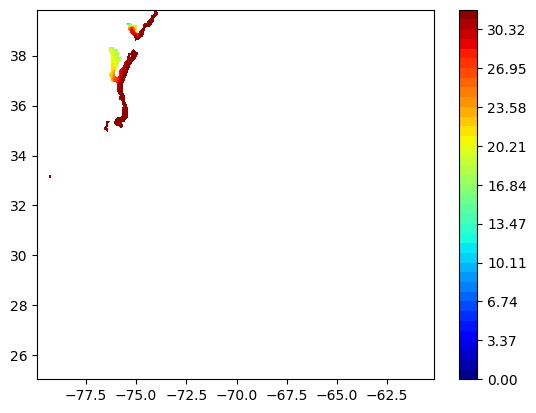

In [ ]:
temp=dataset['salinity']
# check attributes of temp

scale_factor, add_offset=temp.attributes['scale_factor'], temp.attributes['add_offset']
print("scale_factor" + str(scale_factor))
print("add_offset" + str(add_offset))

sst=temp.array[0,0,min(indices_lat)[0]:max(indices_lat)[0],min(indices_lon)[0]:max(indices_lon)[0]]
sst=np.squeeze(sst)


sst=np.squeeze(sst)*scale_factor+add_offset
sst[sst==-10] = np.nan
print(sst.shape)
#print(sst)

long, lati=lon[min(indices_lon)[0]:max(indices_lon)[0]], lat[min(indices_lat)[0]:max(indices_lat)[0]]
#print(long)
#print(lati)

xx,yy=np.meshgrid(long,lati)
print(xx.shape)

levels=[*linspace(0,32,39)]
contourf(xx-360,yy,sst,levels=levels)#,vmin=10,vmax=30)
colorbar()
set_cmap('jet')
